# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import display

# Loading Dataset 

In [8]:
pd.set_option('display.max_columns', None)
fifa21=pd.read_csv(r"C:\Users\PC\Documents\Data Analysis\Datasets\fifa21 raw data v2.csv",encoding='utf-8')
fifa21

C:\Users\PC\AppData\Local\Temp\ipykernel_20420\71854759.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa21=pd.read_csv(r"C:\Users\PC\Documents\Data Analysis\Datasets\fifa21 raw data v2.csv",encoding='utf-8')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281

- Drop unnecessary columns
- Fix newline issues in 'Club' column

In [9]:
clean=(
    fifa21
        .drop(columns=["photoUrl", "playerUrl", "LongName", "Contract", "Loan Date End"])
        .assign(Club=lambda club:club["Club"].str.strip().str.replace("\n", "", regex=True))

)
# Taking random sample of the dataset 
clean.sample(10)

,ID,Name,Nationality,Age,↓OVA,POT,Club,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
811,205525,Bernard,Brazil,27,78,78,Everton,"LM, CAM",164cm,60kg,Right,78,LM,"Aug 9, 2018",€15M,€76K,€20.9M,339,72,65,59,75,68,379,84,77,69,66,83,432,89,79,94,75,95,302,76,61,69,30,66,291,41,42,73,74,61,72,98,31,42,25,52,6,11,13,10,12,1893,393,4 ★,4★,High,Medium,2 ★,84,68,73,85,39,44,50
1907,223197,E. Ünal,Turkey,23,75,81,Getafe CF,ST,187cm,78kg,Right,77,ST,"Aug 12, 2020",€9M,€24K,€21.9M,352,56,75,73,74,74,331,77,68,63,47,76,359,70,69,74,73,73,390,85,80,70,83,72,318,70,29,74,65,80,68,91,34,33,24,56,8,14,8,13,13,1897,399,3 ★,3★,High,Medium,1 ★,69,77,64,76,36,77,68
2285,199562,Ilie Sánchez,Spain,29,74,74,Sporting Kansas City,"CDM, CM",180cm,77kg,Right,74,CDM,"Jan 13, 2017",€3.6M,€8K,€7.2M,275,53,39,68,77,38,317,66,51,49,74,77,326,55,54,72,75,70,342,49,80,83,73,57,330,72,70,53,66,69,72,202,69,69,64,61,6,16,16,12,11,1853,384,3 ★,3★,Medium,High,1 ★,54,47,67,71,69,76,7
6236,253651,D. Mancilla,Bolivia,29,69,69,Nacional Potosí,LB,178cm,74kg,Left,69,LB,"Jan 6, 2019",€1.2M,€500,€1.9M,243,58,37,57,61,30,205,43,32,35,40,55,393,85,85,87,64,72,278,36,76,92,35,39,297,80,67,55,66,29,69,188,70,60,58,51,8,10,15,12,6,1655,356,2 ★,2★,High,Medium,1 ★,85,37,56,54,64,60,3
11091,209475,J. O'Sullivan,Republic of Ireland,26,64,64,Morecambe,"RM, CAM",181cm,83kg,Right,64,RM,"Jul 2, 2019",€650K,€3K,€831K,267,56,52,50,62,47,283,65,55,41,60,62,338,79,79,73,61,46,317,63,62,67,66,59,295,72,60,61,62,40,65,147,46,51,50,53,11,12,11,9,10,1700,375,3 ★,3★,Medium,Medium,1 ★,79,55,59,64,51,67,5
17112,245721,G. Azzinnari,Italy,19,57,71,SC Paderborn 07,ST,175cm,69kg,Right,59,ST,"Jul 1, 2019",€400K,€2K,€490K,251,40,60,60,51,40,226,55,42,35,40,54,325,65,66,63,55,76,280,60,64,56,45,55,235,40,20,60,48,67,50,87,42,25,20,59,14,12,13,10,10,1463,306,2 ★,2★,High,Low,1 ★,66,58,45,57,32,48,NaN
8917,210798,A. Kamara,Sierra Leone,26,66,68,Randers FC,ST,180cm,73kg,Right,68,ST,"Jun 15, 2019",€1.1M,€5K,€1.1M,287,39,65,63,54,66,254,63,60,25,42,64,348,79,75,63,63,68,358,73,81,64,88,52,271,80,20,62,49,60,60,60,21,20,19,56,8,12,15,9,12,1634,357,2 ★,2★,High,Medium,1 ★,77,64,47,64,25,80,4
10313,232871,Gao Zhunyi,China PR,24,65,71,Guangzhou Evergrande Taobao FC,"CB, LB",186cm,79kg,Right,68,RB,"Feb 2, 2019",€1M,€5K,€1.2M,278,64,35,67,65,47,282,52,47,49,64,70,332,68,69,72,66,57,342,66,74,73,69,60,296,62,63,54,54,63,68,191,66,63,62,62,15,10,12,14,11,1783,372,3 ★,2★,Medium,Medium,1 ★,69,49,61,60,64,69,5
10994,254755,O. Noguera,Paraguay,30,64,64,Sportivo Luqueño,"RB, CB",172cm,70kg,Right,64,RB,"Jan 1, 2019",€500K,€500,€753K,235,58,35,60,55,27,219,45,39,31,48,56,295,60,67,62,62,44,235,25,62,63,57,28,204,44,60,35,34,31,44,191,58,68,65,39,9,12,8,5,5,1418,312,2 ★,2★,Medium,Medium,1 ★,64,31,48,51,62,56,3
40,189511,Sergio Busquets,Spain,31,87,87,FC Barcelona,"CDM, CM",189cm,76kg,Right,87,CDM,"Sep 1, 2008",€56M,€240K,€77.9M,330,62,67,68,89,44,386,81,66,68,83,88,284,40,43,67,84,50,337,61,66,81,75,54,387,81,85,77,84,60,93,249,86,83,80,48,5,8,13,9,13,2021,424,3 ★,3★,Medium,Medium,4 ★,42,62,80,80,83,77,119


- Convert `Value`, `Wage`, and `Release Clause` to numerical values

In [10]:
def convert_currency(value):
    if isinstance(value, str):
        value = value.replace("€", "").replace("K", "000").replace("M", "000000").replace("B", "000000000")
        return int(value) if value.isdigit() else np.nan
    return np.nan

clean=(
    clean
    .assign(Value=lambda val:val["Value"].apply(convert_currency))
    .assign(Wage=lambda wag:wag["Wage"].apply(convert_currency))
)

clean["Release Clause"] = clean["Release Clause"].apply(convert_currency)
clean.sample(7)

,ID,Name,Nationality,Age,↓OVA,POT,Club,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
4626,186651,G. Vural,Turkey,32,70,70,Gazişehir Gaziantep F.K.,"CM, RM",177cm,65kg,Left,72,LM,"Jul 25, 2019",NaN,9000,NaN,336,70,62,65,70,69,355,73,77,70,61,74,385,80,79,78,71,77,366,78,77,80,57,74,335,70,61,66,70,68,66,192,62,69,61,52,8,9,16,6,13,2021,420,3 ★,3★,High,Medium,1 ★,79,68,69,74,64,66,2
5292,189661,Álvaro Giménez,Spain,29,70,70,Cádiz CF,ST,183cm,83kg,Left,70,ST,"Aug 4, 2020",NaN,18000,4000000.0,319,57,74,66,62,60,273,66,49,39,49,70,346,70,73,73,70,60,361,71,75,75,74,66,235,25,23,71,61,55,55,72,32,21,19,49,13,10,9,8,9,1655,361,3 ★,3★,Medium,Low,1 ★,72,70,57,68,29,65,4
5503,206601,M. Sampirisi,Italy,27,69,70,AC Monza,"RB, RM",188cm,75kg,Right,69,RB,"Jul 13, 2019",NaN,2000,NaN,275,71,31,66,65,42,275,57,60,32,62,64,326,66,68,65,60,67,301,50,72,73,73,33,277,72,64,52,48,41,63,203,66,69,68,40,8,8,12,6,6,1697,365,3 ★,2★,High,Medium,1 ★,67,37,60,61,67,73,4
13670,207789,Chen Zhizhao,China PR,32,62,62,Guangzhou R&F FC,"CM, CAM, LW",170cm,66kg,Right,65,CAM,"Jan 1, 2016",325000.0,3000,357000.0,258,54,62,42,63,37,326,64,68,68,61,65,363,76,71,71,65,80,317,66,81,57,47,66,265,33,52,67,60,53,54,134,50,49,35,55,7,11,7,14,16,1718,358,4 ★,3★,Medium,Low,1 ★,73,62,61,66,48,48,2
9418,219177,J. Grant,England,25,66,67,Lincoln City,LM,178cm,72kg,Right,66,LM,"Jul 5, 2019",1000000.0,4000,NaN,286,64,63,39,66,54,341,66,68,76,64,67,348,65,70,83,58,72,327,63,58,76,66,64,285,53,43,58,67,64,69,150,46,54,50,58,10,11,15,11,11,1795,379,4 ★,4★,Medium,Medium,1 ★,68,63,66,68,48,66,9
13101,256790,J. Musiala,England,17,62,81,Bayern München II,CAM,181cm,72kg,Right,64,CAM,"Jun 3, 2020",1000000.0,500,NaN,254,52,60,31,60,51,268,68,47,38,49,66,349,79,76,70,55,69,249,57,47,48,42,55,222,37,27,58,58,42,57,86,29,28,29,42,6,9,8,8,11,1470,328,3 ★,2★,Medium,Medium,1 ★,77,57,55,67,29,43,285
17569,257028,F. Kerber,Austria,17,55,77,WSG Tirol,ST,186cm,72kg,Right,57,ST,"Aug 1, 2020",400000.0,500,441000.0,223,32,62,55,41,33,190,40,41,28,28,53,323,65,75,64,55,64,282,47,61,62,65,47,210,26,12,55,47,70,51,44,11,19,14,52,13,9,8,12,10,1324,286,3 ★,2★,Medium,Medium,1 ★,71,55,38,48,18,56,NaN


- Converting `Weight` and `Height` to numeric
- Converting `Hits` to numeric and handle missing values
- Filling missing values for Value and Release Clause with `clean["Value"]`

In [11]:
import pandas as pd
import numpy as np
import re

def convert_height(height_str):
    if pd.isna(height_str):
        return np.nan
    
    match = re.search(r"(\d+)'(\d+)\"", str(height_str))
    if match:
        ft, inch = int(match.group(1)), int(match.group(2))
        return ft * 30.48 + inch * 2.54
    return np.nan

def clean_weight(weight_series):
    def extract_number(weight_str):
        if pd.isna(weight_str):
            return np.nan
        match = re.search(r"([\d.]+)", str(weight_str))
        if match:
            number = float(match.group(1))
            if 'lbs' in str(weight_str) or 'lb' in str(weight_str):
                number *= 0.45359237
            return number
        return np.nan
    return weight_series.apply(extract_number)


clean=(
    clean
    .assign(Height=lambda ht: ht["Height"].apply(convert_height))
    .assign(Weight=lambda wt: clean_weight(wt["Weight"]))
)


clean["Hits"] = pd.to_numeric(clean["Hits"], errors="coerce")
clean["Hits"]=clean["Hits"].fillna(clean["Hits"].median())
clean["Value"]=clean["Value"].fillna(clean["Value"].median())
clean["Release Clause"]=clean["Release Clause"].fillna(clean["Release Clause"].median())
clean

,ID,Name,Nationality,Age,↓OVA,POT,Club,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",NaN,72.0,Left,93,RW,"Jul 1, 2004",525000.0,560000,471000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,"ST, LW",NaN,83.0,Right,92,ST,"Jul 10, 2018",63000000.0,220000,471000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,GK,NaN,87.0,Right,91,GK,"Jul 16, 2014",120000000.0,125000,471000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,"CAM, CM",NaN,70.0,Right,91,CAM,"Aug 30, 2015",129000000.0,370000,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",NaN,68.0,Right,91,LW,"Aug 3, 2017",132000000.0,270000,471000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,CB,NaN,66.0,Right,49,CB,"Jul 13, 2018",100000.0,1000,70000.0,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,5.0
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,CM,NaN,65.0,Right,51,CAM,"Aug 1, 2020",130000.0,500,165000.0,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2 ★,2★,Medium,Medium,1 ★,64,40,48,49,35,45,5.0
18976,252757,R. McKinley,England,18,47,65,Derry City,CM,NaN,74.0,Right,49,CAM,"Mar 8, 2019",120000.0,500,131000.0,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2 ★,2★,Medium,Medium,1 ★,63,39,44,46,40,53,5.0
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,RW,NaN,69.0,Right,48,ST,"Sep 22, 2020",100000.0,2000,88000.0,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3 ★,2★,Medium,Medium,1 ★,58,49,41,49,30,44,5.0


## Top 10 rated Players

In [12]:
clean.nlargest(10, '↓OVA')[["Name", "Nationality", "Club", "↓OVA", "POT"]]

,Name,Nationality,Club,↓OVA,POT
0,L. Messi,Argentina,FC Barcelona,93,93
1,Cristiano Ronaldo,Portugal,Juventus,92,92
2,J. Oblak,Slovenia,Atlético Madrid,91,93
3,K. De Bruyne,Belgium,Manchester City,91,91
4,Neymar Jr,Brazil,Paris Saint-Germain,91,91
5,R. Lewandowski,Poland,FC Bayern München,91,91
6,M. Salah,Egypt,Liverpool,90,90
7,Alisson,Brazil,Liverpool,90,91
8,K. Mbappé,France,Paris Saint-Germain,90,95
9,M. ter Stegen,Germany,FC Barcelona,90,93


## Least 10 rated players 

In [13]:
clean.nsmallest(10, '↓OVA')[["Name", "Nationality", "Club", "↓OVA", "POT"]]

,Name,Nationality,Club,↓OVA,POT
18965,Chen Zitong,China PR,Shijiazhuang Ever Bright F.C.,47,51
18966,Wang Zhenghao,China PR,Tianjin TEDA FC,47,51
18967,Zhong Jiyu,China PR,Shijiazhuang Ever Bright F.C.,47,55
18968,Huang Wenzhou,China PR,Shanghai SIPG FC,47,53
18969,Song Yue,China PR,Tianjin TEDA FC,47,47
18970,Wang Huapeng,China PR,Guangzhou R&F FC,47,53
18971,M. Flores,Bolivia,Club Bolívar,47,63
18972,Zhang Mengxuan,China PR,Chongqing Dangdai Lifan FC SWM Team,47,52
18973,V. Da Silva,England,Oldham Athletic,47,67
18974,Xia Ao,China PR,Wuhan Zall,47,55


## Distribution of player overall ratings

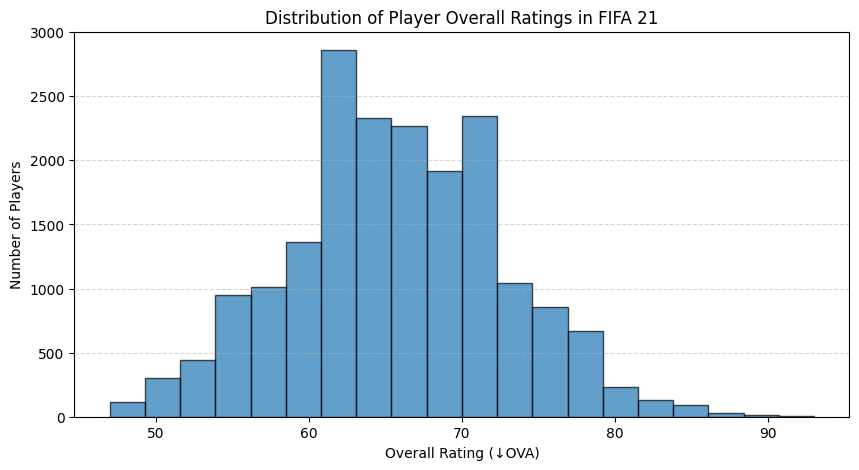

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(clean["↓OVA"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Overall Rating (↓OVA)")
plt.ylabel("Number of Players")
plt.title("Distribution of Player Overall Ratings in FIFA 21")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## Most common nationalities

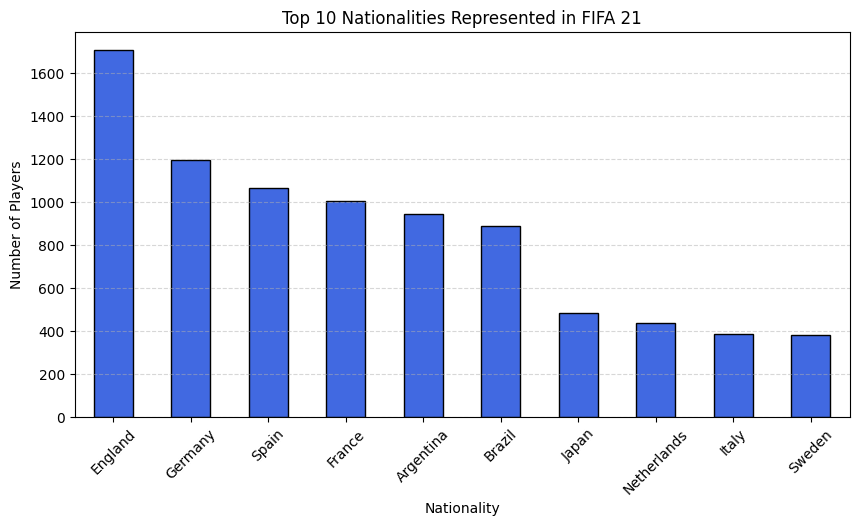

In [15]:
top_nationalities = clean["Nationality"].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_nationalities.plot(kind="bar", color="royalblue", edgecolor="black")
plt.xlabel("Nationality")
plt.ylabel("Number of Players")
plt.title("Top 10 Nationalities Represented in FIFA 21")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## Top Rated Players and their Club

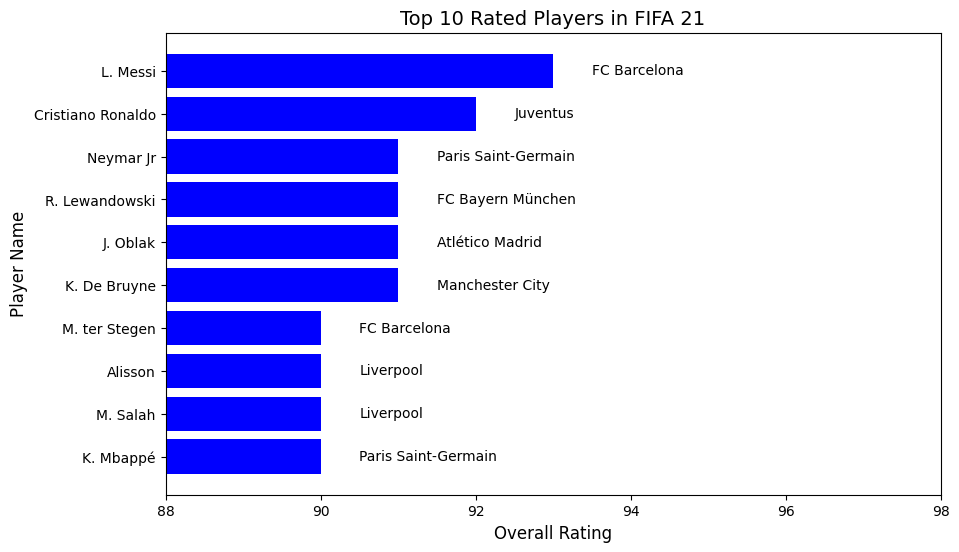

In [18]:

top_players=(
    clean
    .loc[:,['Name', '↓OVA', 'Club']]
    .dropna()
    .rename(columns={'↓OVA': 'Overall'})
    .sort_values(by='Overall', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_players['Name'], top_players['Overall'], color='blue')
for bar, club in zip(bars, top_players['Club']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, club, va='center', fontsize=10)
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Player Name", fontsize=12)
plt.title("Top 10 Rated Players in FIFA 21", fontsize=14)
plt.xlim(top_players['Overall'].min() - 2, top_players['Overall'].max() + 5)
plt.gca().invert_yaxis()
plt.show()

## Age vs. Overall Rating of Players

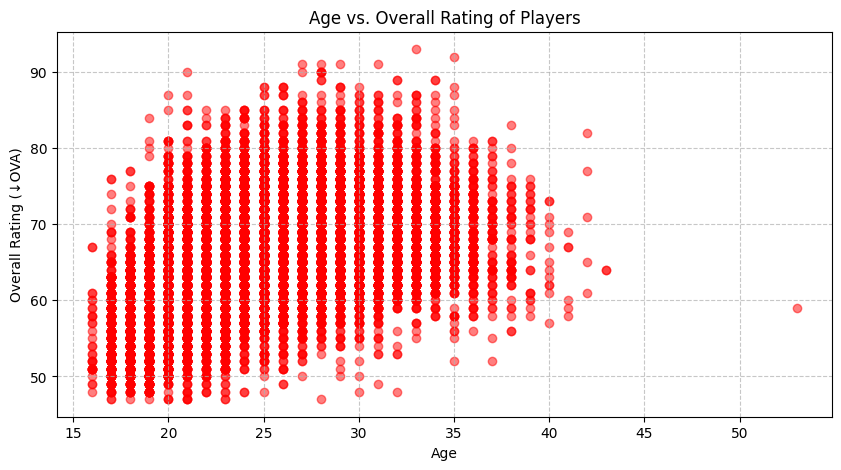

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(clean['Age'], clean['↓OVA'], alpha=0.5, color='red')
plt.xlabel("Age")
plt.ylabel("Overall Rating (↓OVA)")
plt.title("Age vs. Overall Rating of Players")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()